In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

In [4]:
#relation between the minimum and maximum temprture

In [5]:
war=pd.read_csv('worldwar.csv')
war.head(3)

C:\Users\Raghav Jha\Anaco\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,01-07-1942,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,02-07-1942,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,03-07-1942,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
war.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [7]:
war.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


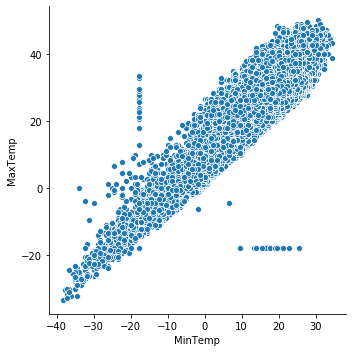

In [8]:
sns.relplot(x='MinTemp',y='MaxTemp',data=war)

In [9]:
x=war['MinTemp'].values.reshape(-1,1)
y=war['MaxTemp'].values.reshape(-1,1)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [11]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lr.score(X_train,y_train)

0.7717503991986545

In [16]:
lr.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lr.score(X_test,y_test)

0.771092480840795

In [18]:
lr.intercept_

array([10.72960716])

In [19]:
lr.coef_

array([[0.91831787]])

In [20]:
y_predict=lr.predict(X_test)
y_predict

array([[27.56543479],
       [30.11631777],
       [30.11631777],
       ...,
       [33.17737733],
       [-8.14692686],
       [27.56543479]])

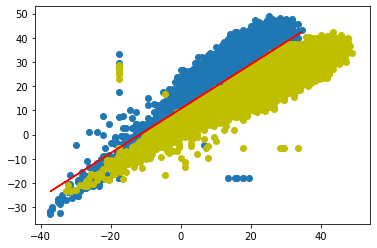

In [21]:
fig,ax = plt.subplots()
plt.scatter(X_test,y_test)
plt.plot(X_test, y_predict,color='r')
plt.scatter(y_test,y_predict,color='y')

          Actual  Predicted
0      30.000000  27.565435
1      28.888889  30.116318
2      28.333333  30.116318
3      33.333333  35.218084
4      38.888889  35.728260
...          ...        ...
35707  21.666667  19.912786
35708  27.222222  28.585788
35709  33.888889  33.177377
35710 -12.777778  -8.146927
35711  21.666667  27.565435

[35712 rows x 2 columns] [[ 2.43456521]
 [-1.22742888]
 [-1.78298444]
 ...
 [ 0.71151156]
 [-4.63085092]
 [-5.89876812]]


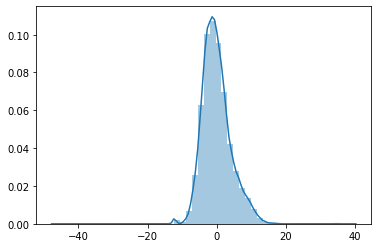

In [22]:
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predict.flatten()})
resdual=y_test-y_predict
print(df,resdual)
sns.distplot(resdual)

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
mean_absolute_error(y_test,y_predict)

3.1877725473160936

In [24]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Squared Error: 17.248623246650908
Root Mean Squared Error: 4.153146186525452


In [25]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_predict)
r2

0.771092480840795

          Actual  Predicted
0      30.000000  27.535909
1      28.888889  30.088570
2      28.333333  30.088570
3      33.333333  35.193891
4      38.888889  35.704423
...          ...        ...
35707  21.666667  19.877927
35708  27.222222  28.556973
35709  33.888889  33.151762
35710 -12.777778  -8.201338
35711  21.666667  27.535909

[35712 rows x 2 columns] [[ 2.46409101]
 [-1.19968064]
 [-1.7552362 ]
 ...
 [ 0.73712673]
 [-4.5764393 ]
 [-5.86924232]]
Mean Squared Error: 17.249541905892638
Root Mean Squared Error: 4.153256783042994


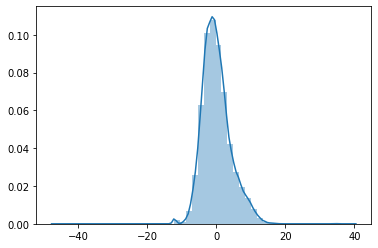

In [26]:
#ridge regression implemnt optimize the value
from sklearn.linear_model import Ridge 
r=Ridge(alpha=1)
r.fit(X_train,y_train)
y_predict=r.predict(X_test)
y_predict
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predict.flatten()})
resdual=y_test-y_predict
print(df,resdual)
sns.distplot(resdual)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
mean_absolute_error(y_test,y_predict)

3.1849299193959486

In [28]:
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test)
y_pred

array([27.52778567, 30.0405962 , 30.0405962 , ..., 33.05596883,
       -7.65156171, 27.52778567])